<a href="https://colab.research.google.com/github/ranjita782/python-projects/blob/main/ola1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



   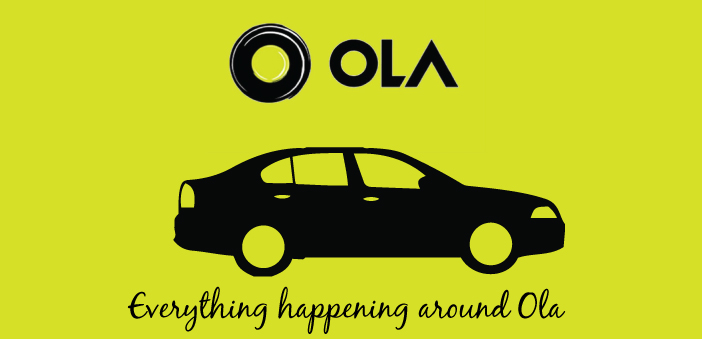


In [ ]:
!gdown 194oiYUx917jxPLvqnFPtPDi3n09Ullkj

Downloading...
From: https://drive.google.com/uc?id=194oiYUx917jxPLvqnFPtPDi3n09Ullkj
To: /content/ola.csv
100% 1.13M/1.13M [00:00<00:00, 21.8MB/s]


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#to ignore warnings
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm

In [ ]:
# Import the dataset
df=pd.read_csv('ola.csv')

# 1.a Problem Statement:

Ola is facing a significant challenge with driver attrition.Given the competitive landscape drivers can easily switch to competitors like Uber based on rate fluctuations.These high churn rates among drivers disrupt the operational stability as well as increase costs related to recruiting and training new drivers. To address this issue, the Analytics Department at Ola has tasked the data science team with developing a predictive model that can forecast driver attrition. The model should analyze and predict whether a driver is likely to leave the company based on a range of attributes, including demographics,tenure informationand performance history. Ola's goal is to proactively engage with these drivers who are at risk of leaving, and implement retention strategies that could reduce churn and lower recruitment costs. This should also help in maintaining the morale within the organization.

In [ ]:
df.shape

(19104, 14)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19104 entries, 0 to 19103
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Unnamed: 0            19104 non-null  int64  
 1   MMM-YY                19104 non-null  object 
 2   Driver_ID             19104 non-null  int64  
 3   Age                   19043 non-null  float64
 4   Gender                19052 non-null  float64
 5   City                  19104 non-null  object 
 6   Education_Level       19104 non-null  int64  
 7   Income                19104 non-null  int64  
 8   Dateofjoining         19104 non-null  object 
 9   LastWorkingDate       1616 non-null   object 
 10  Joining Designation   19104 non-null  int64  
 11  Grade                 19104 non-null  int64  
 12  Total Business Value  19104 non-null  int64  
 13  Quarterly Rating      19104 non-null  int64  
dtypes: float64(2), int64(8), object(4)
memory usage: 2.0+ MB


Ola data set has 19104 rows as well as 14 columns , once converted to a .csv file. It contains 8 integer datatypes , 2 float types and 4 object types. Out of the 4 object datatypes, three are converted to datetime variables and one remains to be a categorical variable.

```
Unnamed: 0: This likely represents an index or identifier, ranging from 0 to 19,103.
Driver_ID: Unique identifier for drivers, with values ranging from 1 to 2,788.
Age: Drivers’ ages vary between 21 and 58.
Gender: A binary variable where 0 and 1 represent different genders.
Education Level: Categorized with values from 0 to 2.
Income: Income of drivers ranges widely from 10,747 to 188,418.
Joining Designation: Represents the starting designation, varying from 1 to 5.
Grade: A classification that ranges from 1 to 5.
Total Business Value: This feature has a very wide range, including negative values (possibly indicating losses) and a maximum of 33,747,720.
Quarterly Rating: Performance rating on a scale of 1 to 4.
```

```
Numerical Columns:

Age: Ranges from 21 to 58, with a mean age of 34.67 and a standard deviation of 6.26.
Gender: Binary, with values ranging from 0 to 1. The mean is 0.42, indicating that approximately 42% of the drivers are of one gender.
Education Level: Ranges from 0 to 2, with a mean of 1.02 and a standard deviation of 0.80.
Income: Ranges from 10,747 to 188,418, with a mean income of 65,652.03 and a standard deviation of 30,914.52.
Joining Designation: Ranges from 1 to 5, with a mean of 1.69 and a standard deviation of 0.84.
Grade: Ranges from 1 to 5, with a mean of 2.25 and a standard deviation of 1.03.
Total Business Value: Ranges from -6,000,000 to 33,747,720, with a mean of 571,662.07 and a standard deviation of 1,128,312.00.
Quarterly Rating: Ranges from 1 to 4, with a mean of 2.01 and a standard deviation of 1.01.

Categorical Columns:
MMM-YY: 24 unique values representing months from January 2019 to December 2019.
City: 29 unique values, with the most frequent city being C20, occurring 1,008 times.

Datetime columns:
Dateofjoining: 869 unique values, with the most common joining date being 23/07/15, occurring 192 times.
LastWorkingDate: 493 unique values, with the most frequent last working date being 29/07/20, occurring 70 times.
```

In [ ]:
df.isna().sum()

,0
Unnamed: 0,0
MMM-YY,0
Driver_ID,0
Age,61
Gender,52
City,0
Education_Level,0
Income,0
Dateofjoining,0
LastWorkingDate,17488


The numerical columns Gender and Age have missing values as well as LastWorkingDate which is an object data type.

In [ ]:
(df.isnull().sum()/(len(df)))*100

,0
Unnamed: 0,0.000000
MMM-YY,0.000000
Driver_ID,0.000000
Age,0.319305
Gender,0.272194
City,0.000000
Education_Level,0.000000
Income,0.000000
Dateofjoining,0.000000
LastWorkingDate,91.541039


The percentage of missing values for the columns Age,Gender and LastWorkingDate are 31%,27% and 91% respectively.

In [ ]:
df.nunique()

,0
Unnamed: 0,19104
MMM-YY,24
Driver_ID,2381
Age,36
Gender,2
City,29
Education_Level,3
Income,2383
Dateofjoining,869
LastWorkingDate,493


Hereby we understand there are 19104 rows but only 2381 unique Driver_IDs.The field Quarterly rating is having only 4 levels.

In [ ]:
#2.1 Drop any irrelevant column present in the dataset.
df = df.drop(columns=['Unnamed: 0'])
#Check the shape of the dataset after dropping the column.
df.shape

(19104, 13)

In [ ]:
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
MMM-YY,19104,24,01/01/19,1022,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Driver_ID,19104.0,NaN,NaN,NaN,1415.591133,810.705321,1.0,710.0,1417.0,2137.0,2788.0
Age,19043.0,NaN,NaN,NaN,34.668435,6.257912,21.0,30.0,34.0,39.0,58.0
Gender,19052.0,NaN,NaN,NaN,0.418749,0.493367,0.0,0.0,0.0,1.0,1.0
City,19104,29,C20,1008,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Education_Level,19104.0,NaN,NaN,NaN,1.021671,0.800167,0.0,0.0,1.0,2.0,2.0
Income,19104.0,NaN,NaN,NaN,65652.025126,30914.515344,10747.0,42383.0,60087.0,83969.0,188418.0
Dateofjoining,19104,869,23/07/15,192,NaN,NaN,NaN,NaN,NaN,NaN,NaN
LastWorkingDate,1616,493,29/07/20,70,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Joining Designation,19104.0,NaN,NaN,NaN,1.690536,0.836984,1.0,1.0,1.0,2.0,5.0


The dataset spans 24 unique months, with the highest frequency in January 2019 (1022 occurrences).

The Driver_ID value ranges from 1 to 2788.

Ages range from 21 to 58 years, indicating a relatively young workforce.The mean age of drivers is 34.67 years with a standard deviation of 6.26 years.

Ages range from 21 to 58 years, indicating a relatively young workforce.

Gender is encoded as 0 (likely for female) and 1 (likely for male), with a mean of 0.42. There is an almost balanced gender distribution, with ~42% female drivers and 58% male drivers.

The data covers 29 unique cities, with the city labeled as C20 having the most occurrences (1008 drivers).

The mean education level is 1.02, with the data spread over categories like secondary education, higher secondary and then graduates.Most drivers seem to fall into the middle category.

The average income of drivers is ₹65,652, with a large standard deviation of ₹30,914. Income ranges from ₹10,747 to ₹1,88,418, indicating a large variance in driver earnings.This large spread suggests the possibility of high-income earners skewing the average upward.

The dataset contains records from 869 unique joining dates, with the most frequent date being 23rd July 2015 (192 occurrences).
There are 1616 records of drivers who have left the company, with the most common exit date being 29th July 2020. Only a small fraction of drivers have a recorded LastWorkingDate, implying that most drivers are still active or this data is incomplete.

Mean joining designation is 1.69, with designations ranging from 1 to 5.

The mean grade is 2.25, with grades ranging from 1 to 5, telling it could be a performance or seniority metric.
Grades seem to follow a normal distribution, with most drivers clustered between 1 and 3.

The mean total business value is ₹5,71,662, but with a very large standard deviation of ₹11,28,312. Values range from -₹60,00,000 to ₹3,37,47,720, showing a significant variation in driver performance. Also this negative values could suggest the arrears or liabilities due.

The mean quarterly rating is 2.01, with ratings ranging from 1 to 4. Ratings seem to be concentrated around 1 to 3, indicating a relatively average level of performance for most drivers.


In [ ]:
categorical_cols=df.select_dtypes(include=['object']).columns
numerical_cols = df.select_dtypes(include=np.number).columns.tolist()
print("Categorical Variables:")
print(categorical_cols)
print("Numerical Variables:")
print(numerical_cols)

Categorical Variables:
Index(['MMM-YY', 'City', 'Dateofjoining', 'LastWorkingDate'], dtype='object')
Numerical Variables:
['Driver_ID', 'Age', 'Gender', 'Education_Level', 'Income', 'Joining Designation', 'Grade', 'Total Business Value', 'Quarterly Rating']


Driver_ID
Skew : -0.02


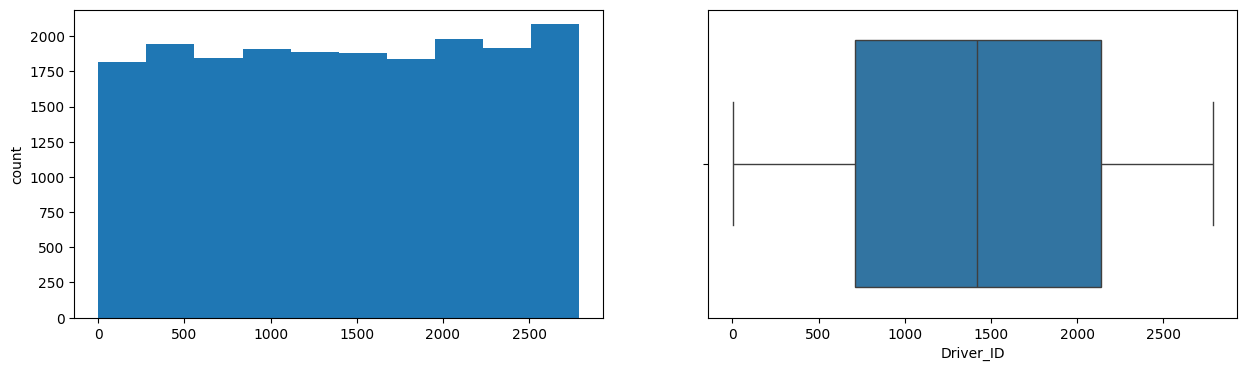

Age
Skew : 0.44


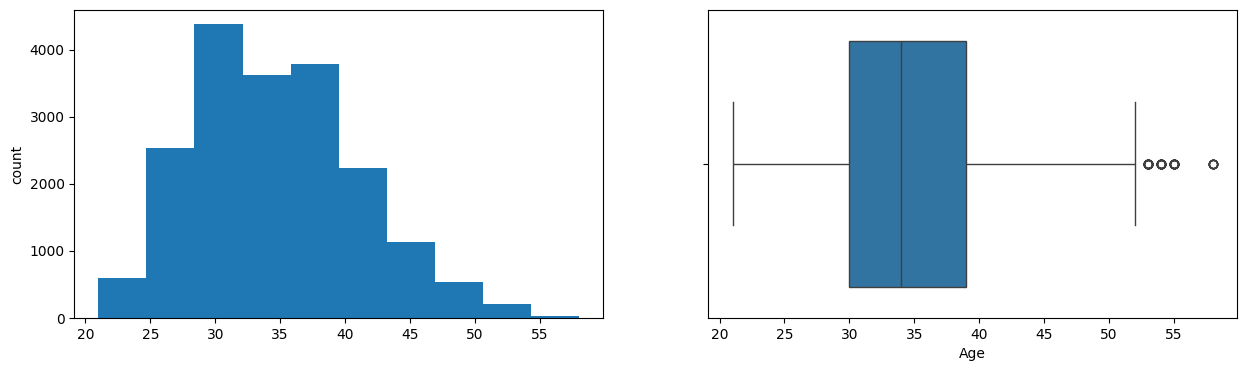

Gender
Skew : 0.33


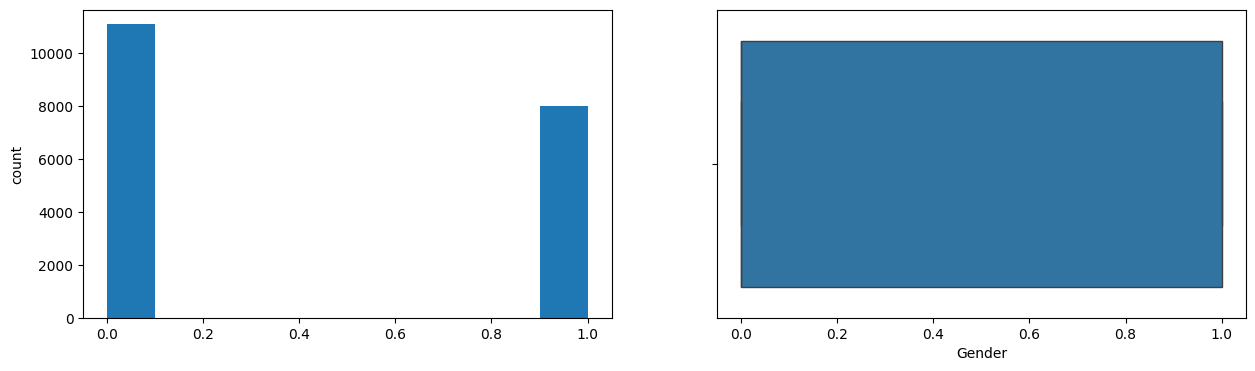

Education_Level
Skew : -0.04


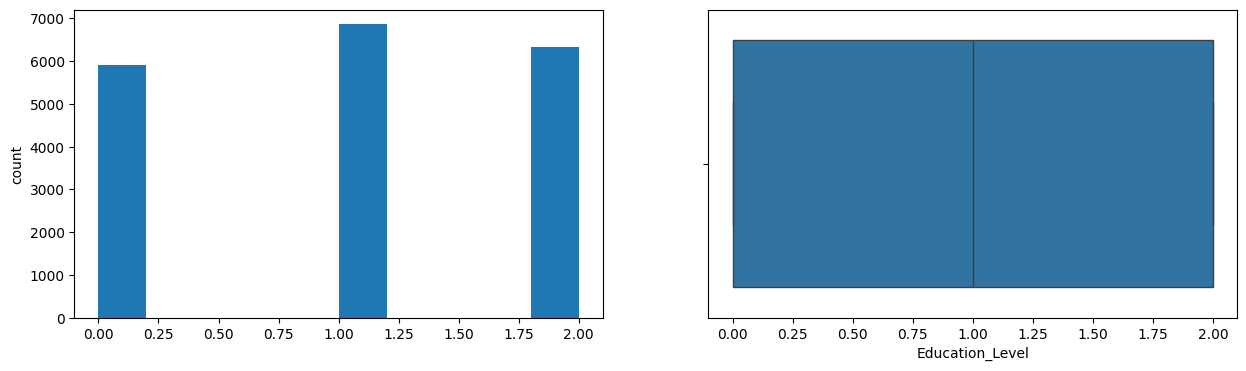

Income
Skew : 0.71


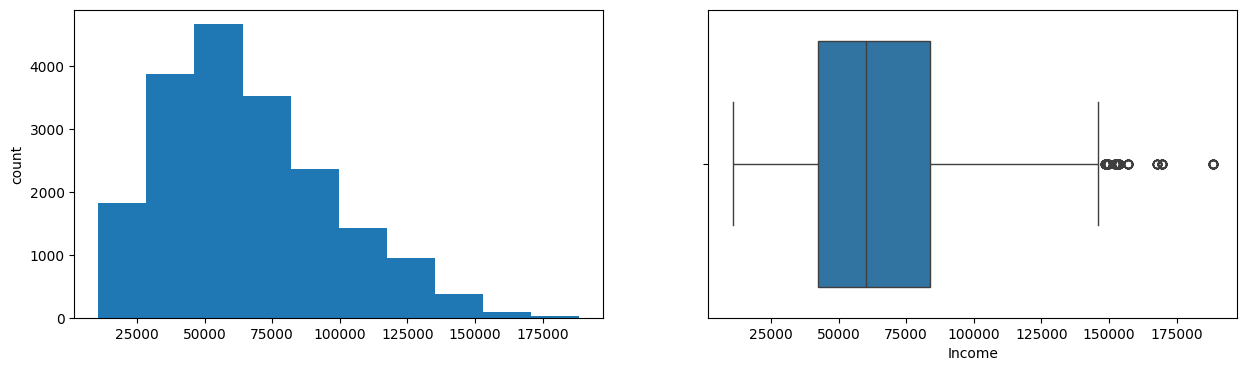

Joining Designation
Skew : 1.09


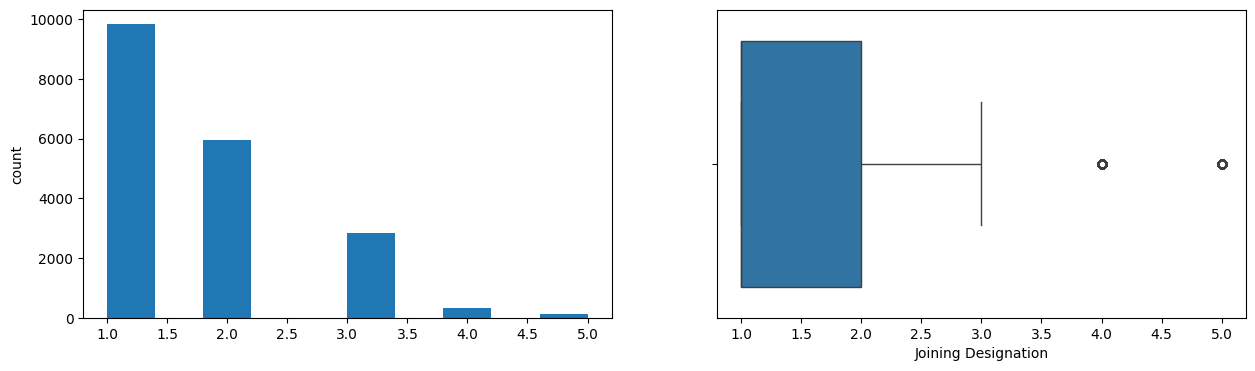

Grade
Skew : 0.46


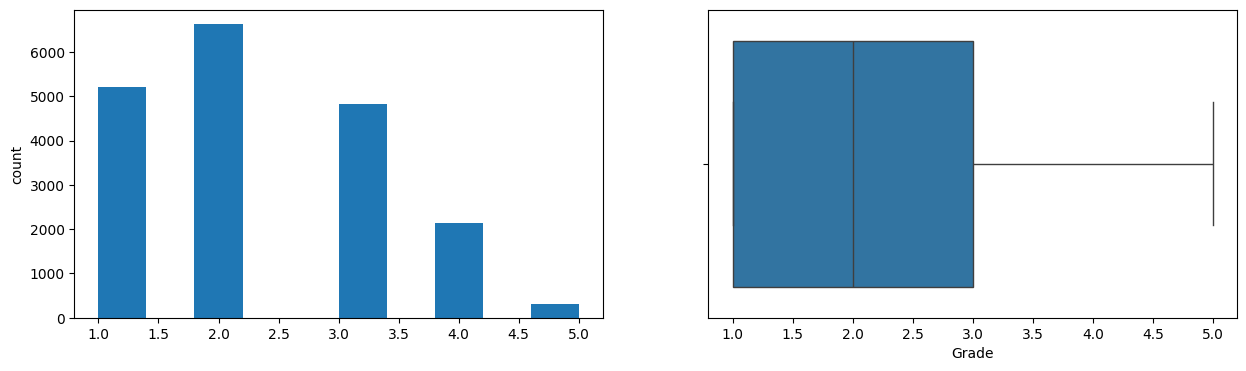

Total Business Value
Skew : 6.97


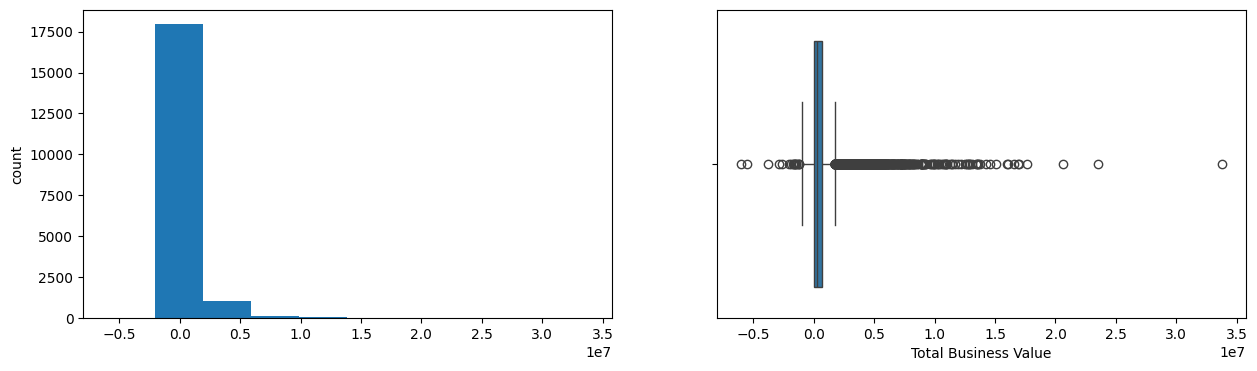

Quarterly Rating
Skew : 0.59


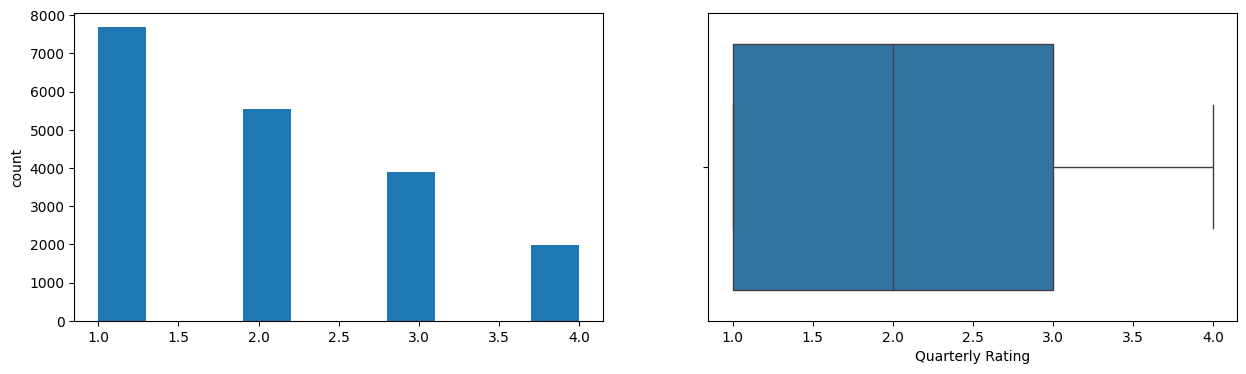

In [ ]:
#UNIVARIATE ANALYSIS
for col in numerical_cols:
    print(col)
    print('Skew :', round(df[col].skew(), 2))
    plt.figure(figsize = (15, 4))
    plt.subplot(1, 2, 1)
    df[col].hist(grid=False)
    plt.ylabel('count')
    plt.subplot(1, 2, 2)
    sns.boxplot(x=df[col])
    plt.show()

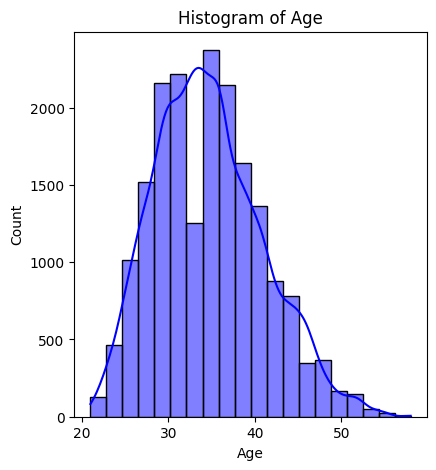

<Figure size 500x300 with 0 Axes>

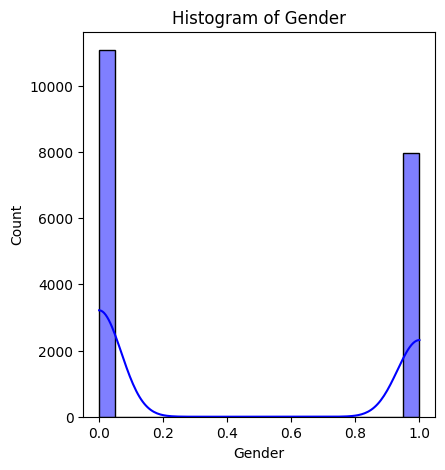

<Figure size 500x300 with 0 Axes>

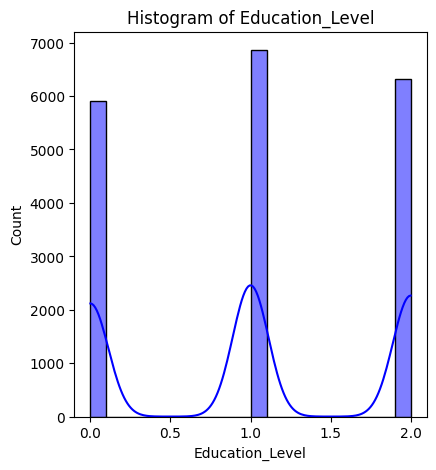

<Figure size 500x300 with 0 Axes>

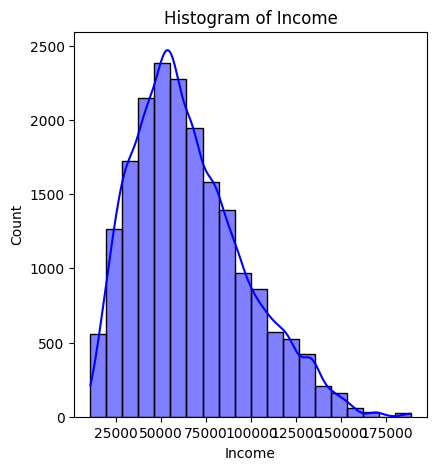

<Figure size 500x300 with 0 Axes>

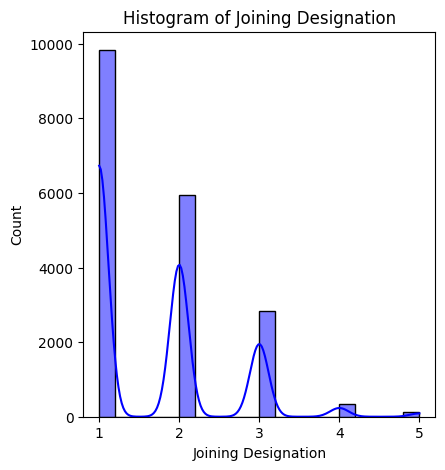

<Figure size 500x300 with 0 Axes>

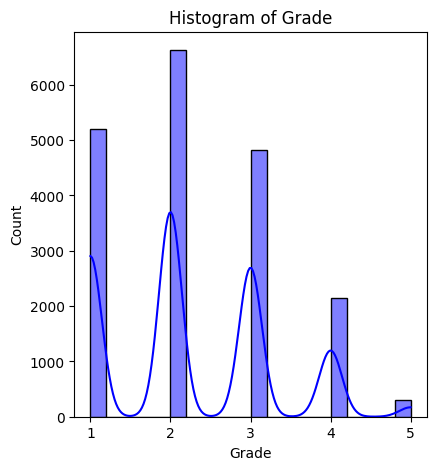

<Figure size 500x300 with 0 Axes>

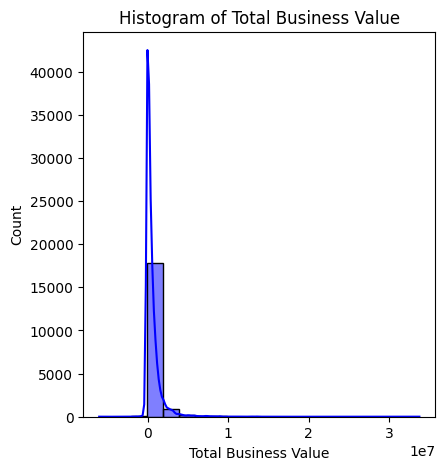

<Figure size 500x300 with 0 Axes>

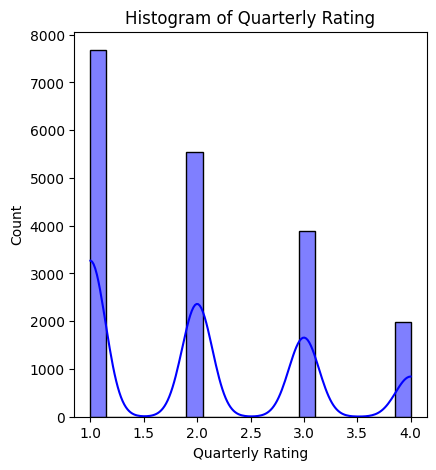

<Figure size 500x300 with 0 Axes>

In [ ]:
# List of continuous variables
# Plot histograms for continuous variables
numerical_cols=['Age', 'Gender', 'Education_Level', 'Income',
       'Joining Designation', 'Grade', 'Total Business Value',
       'Quarterly Rating']
for var in numerical_cols:
    plt.figure(figsize=(10,5))
    plt.subplot(1, 2, 1)
    sns.histplot(df[var].dropna(), kde=True,bins=20, color='blue')
    plt.title(f'Histogram of {var}')
    plt.figure(figsize=(5,3))
    plt.show()

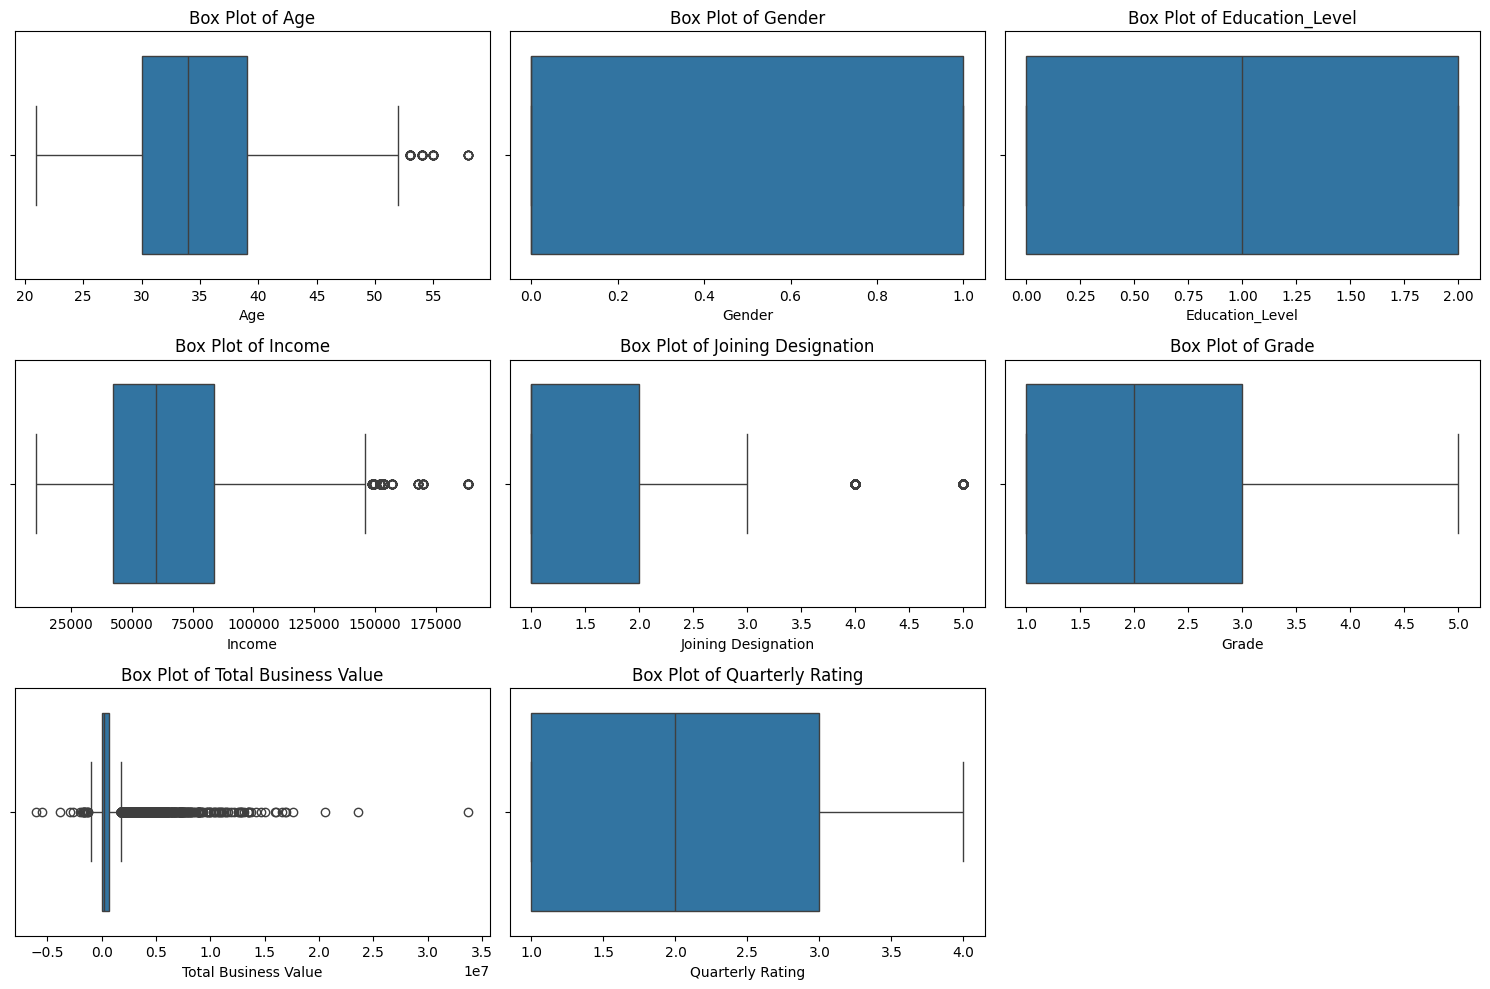

In [ ]:
numerical_cols=['Age', 'Gender', 'Education_Level', 'Income',
       'Joining Designation', 'Grade', 'Total Business Value',
       'Quarterly Rating']
plt.figure(figsize=(15, 10))

for i, col in enumerate(numerical_cols, 1):
    plt.subplot(3, 3, i)  # Adjust the grid size depending on the number of plots
    sns.boxplot(x=df[col])
    plt.title(f'Box Plot of {col}')
    plt.xlabel(col)

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()

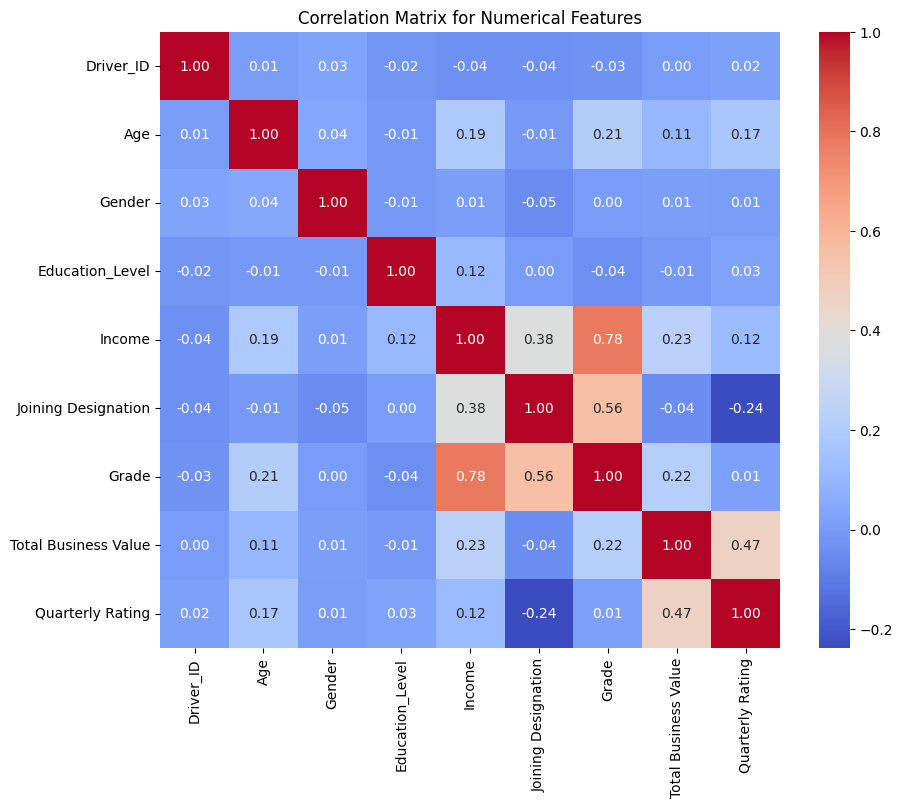

In [ ]:
# Select specific columns you want to include in the heatmap
import seaborn as sns
import matplotlib.pyplot as plt

# List of selected columns (since all are int or float)
selected_columns = ['Driver_ID', 'Age', 'Gender', 'Education_Level',
                    'Income', 'Joining Designation', 'Grade',
                    'Total Business Value', 'Quarterly Rating']

# Filter the dataframe to include only the selected columns
df_selected = df[selected_columns]

# Calculate the correlation matrix for the selected columns
correlation_matrix = df_selected.corr()

# Optionally, plot the full correlation matrix for the entire dataset (if needed)
plt.figure(figsize=(10, 8))
sns.heatmap(df_selected.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix for Numerical Features')
plt.show()


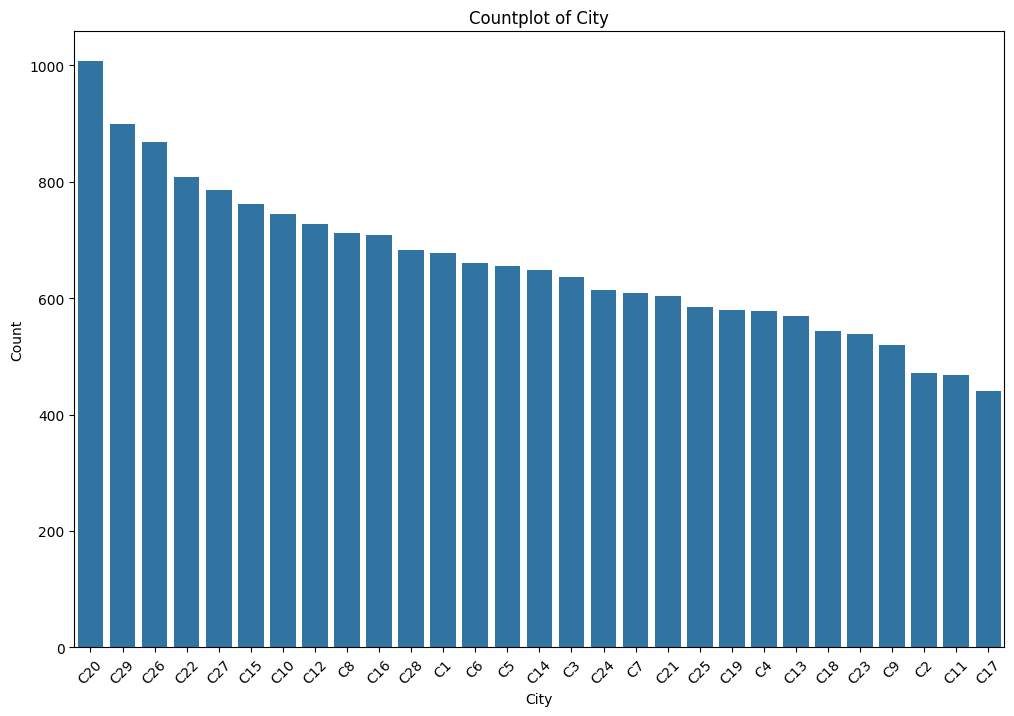

In [ ]:
# Count plot for categorical variable
var = 'City'
# Order cities by frequency
city_order = df[var].value_counts().index

plt.figure(figsize=(12, 8))

# Plot countplot with ordered categories
sns.countplot(data=df, x=var, order=city_order)

plt.title(f'Countplot of {var}')
plt.xlabel(var)
plt.ylabel('Count')
plt.xticks(rotation=45)

plt.show()


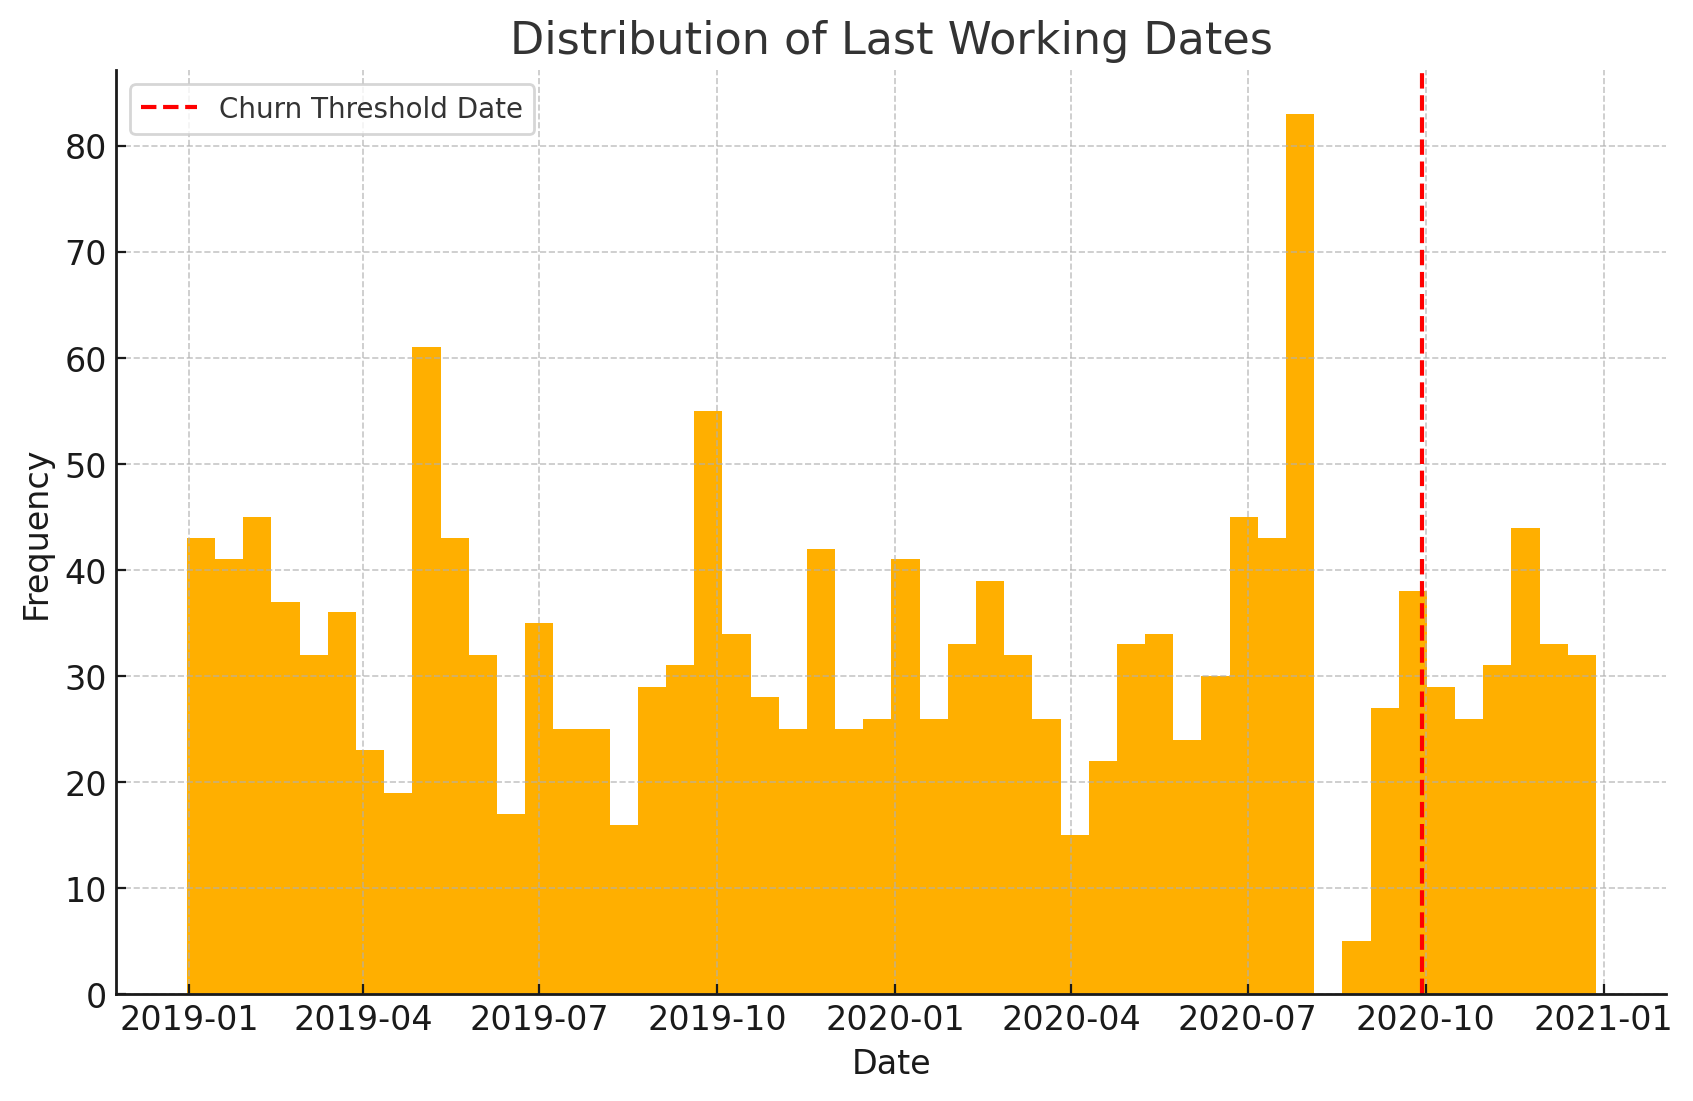

Distribution of LastWorkingDate:

The dataset includes 1,616 valid LastWorkingDate entries, with dates ranging from 2018-12-31 to 2020-12-28.
The most frequent date is 2020-07-29, which appears 70 times.
The histogram shows a concentration of dates before the churn_threshold_date of 2020-09-29, which is why most drivers are classified as churned.

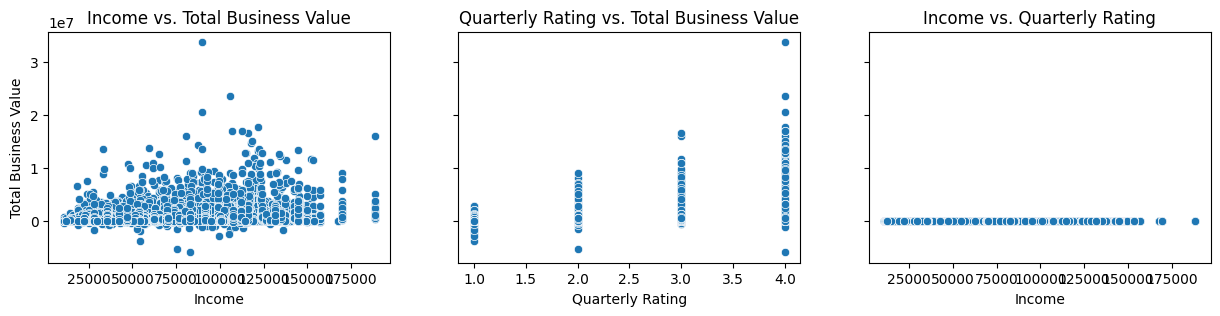

In [ ]:
# BIVARIATE ANALYSIS

#Example: Analyzing relationship using scatter plots
fig, axes = plt.subplots(1, 3, figsize=(15, 3), sharey=True)

# Plot 1: Income vs. Total Business Value
sns.scatterplot(data=df, x='Income', y='Total Business Value', ax=axes[0])
axes[0].set_title('Income vs. Total Business Value')
axes[0].set_xlabel('Income')
axes[0].set_ylabel('Total Business Value')

# Plot 2: Quarterly Rating vs. Total Business Value
sns.scatterplot(data=df, x='Quarterly Rating', y='Total Business Value', ax=axes[1])
axes[1].set_title('Quarterly Rating vs. Total Business Value')
axes[1].set_xlabel('Quarterly Rating')
axes[1].set_ylabel('Total Business Value')

# Plot 3: Income vs. Quarterly Rating
sns.scatterplot(data=df, x='Income', y='Quarterly Rating', ax=axes[2])
axes[2].set_title('Income vs. Quarterly Rating')
axes[2].set_xlabel('Income')
axes[2].set_ylabel('Quarterly Rating')
plt.show()


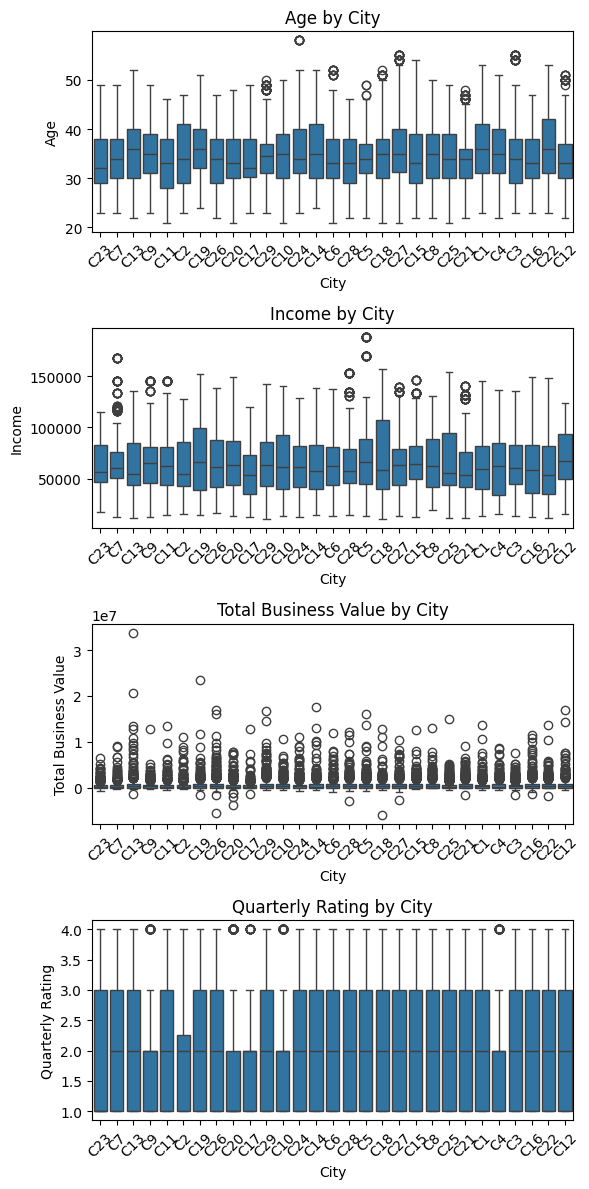

In [ ]:
continuous_vars = ['Age', 'Income', 'Total Business Value', 'Quarterly Rating']

# Create subplots for boxplots
fig, axes = plt.subplots(len(continuous_vars), 1, figsize=(6, 3 * len(continuous_vars)))

# Plot each continuous variable against the categorical variable
for i, var in enumerate(continuous_vars):
    sns.boxplot(data=df, x='City', y=var, ax=axes[i])
    axes[i].set_title(f'{var} by City')
    axes[i].set_xlabel('City')
    axes[i].set_ylabel(var)
    axes[i].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()


Joining Designation     1     2     3    4   5
Gender                                        
0.0                  5489  3538  1716  244  87
1.0                  4309  2408  1122   97  42


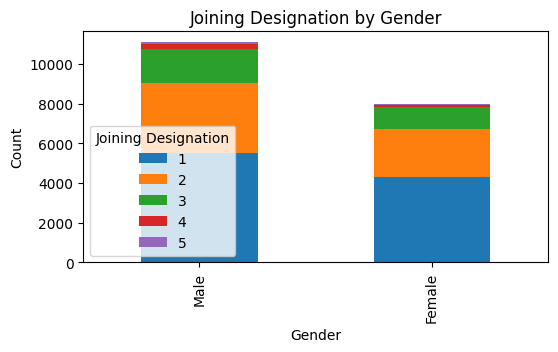

In [ ]:
crosstab_result = pd.crosstab(df['Gender'], df['Joining Designation'])
print(crosstab_result)

# Plot
crosstab_result.plot(kind='bar', stacked=True, figsize=(6, 3))
plt.title('Joining Designation by Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.xticks(ticks=[0, 1], labels=['Male', 'Female'])
plt.show()


Education_Level     0     1     2
Grade                            
1                1589  1804  1809
2                1940  2410  2277
3                1502  1790  1534
4                 801   739   604
5                  81   121   103


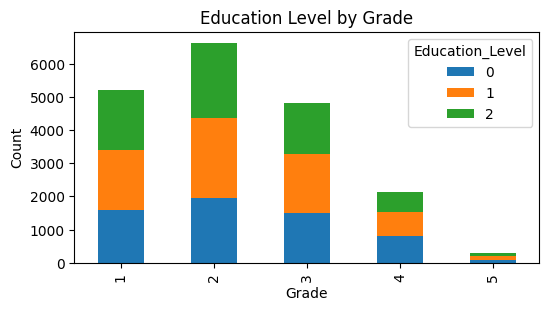

In [ ]:
# Crosstab
crosstab_result = pd.crosstab(df['Grade'], df['Education_Level'])
print(crosstab_result)
crosstab_result.plot(kind='bar', stacked=True, figsize=(6, 3))
plt.title('Education Level by Grade')
plt.xlabel('Grade')
plt.ylabel('Count')
plt.show()


In [ ]:
correlation_matrix = df[['Income', 'Total Business Value', 'Quarterly Rating']].corr()
print(correlation_matrix)


                        Income  Total Business Value  Quarterly Rating
Income                1.000000              0.234044          0.116897
Total Business Value  0.234044              1.000000          0.471224
Quarterly Rating      0.116897              0.471224          1.000000


In [ ]:
correlation_matrix = df[['Age','Quarterly Rating']].corr()
print(correlation_matrix)

                       Age  Quarterly Rating
Age               1.000000          0.171818
Quarterly Rating  0.171818          1.000000


The weak positive correlation (0.17) indicates that age has a slight influence on quarterly rating. This suggests that as a driver's age increases, the quarterly rating tends to increase slightly, but the linear relationship is not strong.

<Figure size 1200x800 with 0 Axes>

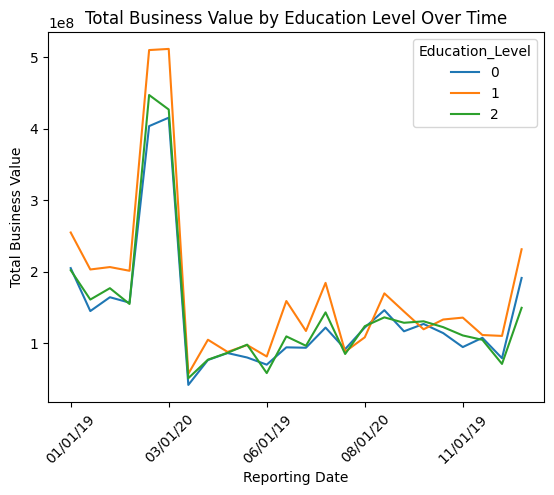

In [ ]:
# Aggregate data by Reporting Date and Education Level
pivot_table = df.pivot_table(values='Total Business Value',
                             index='MMM-YY',
                             columns='Education_Level',
                             aggfunc='sum')

plt.figure(figsize=(12, 8))
pivot_table.plot()
plt.title('Total Business Value by Education Level Over Time')
plt.xlabel('Reporting Date')
plt.ylabel('Total Business Value')
plt.xticks(rotation=45)
plt.show()


<Figure size 1200x800 with 0 Axes>

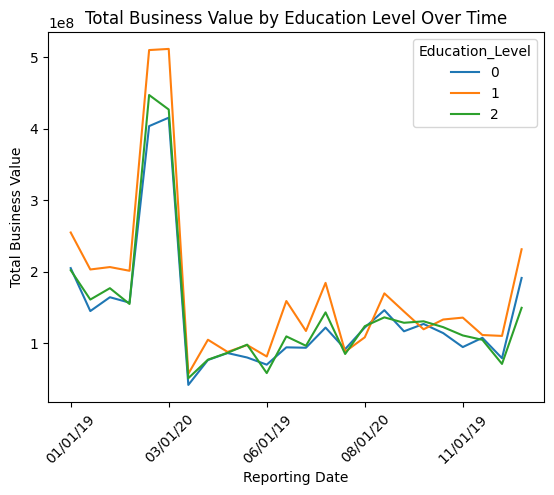

In [ ]:
# Aggregate data by Reporting Date and Education Level
pivot_table = df.pivot_table(values='Total Business Value',
                             index='MMM-YY',
                             columns='Education_Level',
                             aggfunc='sum')

plt.figure(figsize=(12, 8))
pivot_table.plot()
plt.title('Total Business Value by Education Level Over Time')
plt.xlabel('Reporting Date')
plt.ylabel('Total Business Value')
plt.xticks(rotation=45)
plt.show()


In [ ]:
# Example of aggregating statistics
df['Mean Total Business Value by City'] = df.groupby('City')['Total Business Value'].transform('mean')
df['Mean Income by City'] = df.groupby('City')['Income'].transform('mean')


In [ ]:
df['Age_Income_Interaction'] = df['Age'] * df['Income']


In [ ]:
bins = [0, 25, 35, 45, 55, 65, 100]
labels = ['<25', '25-34', '35-44', '45-54', '55-64', '65+']
df['Age_Group'] = pd.cut(df['Age'], bins=bins, labels=labels)


In [ ]:
income_bins = [0, 20000, 40000, 60000, 80000, 100000, 200000]
income_labels = ['<20k', '20k-39k', '40k-59k', '60k-79k', '80k-99k', '100k+']
df['Income_Group'] = pd.cut(df['Income'], bins=income_bins, labels=income_labels)


In [ ]:
df['Business Value to Income Ratio'] = df['Total Business Value'] / (df['Income'] + 1)  # Add 1 to avoid division by zero


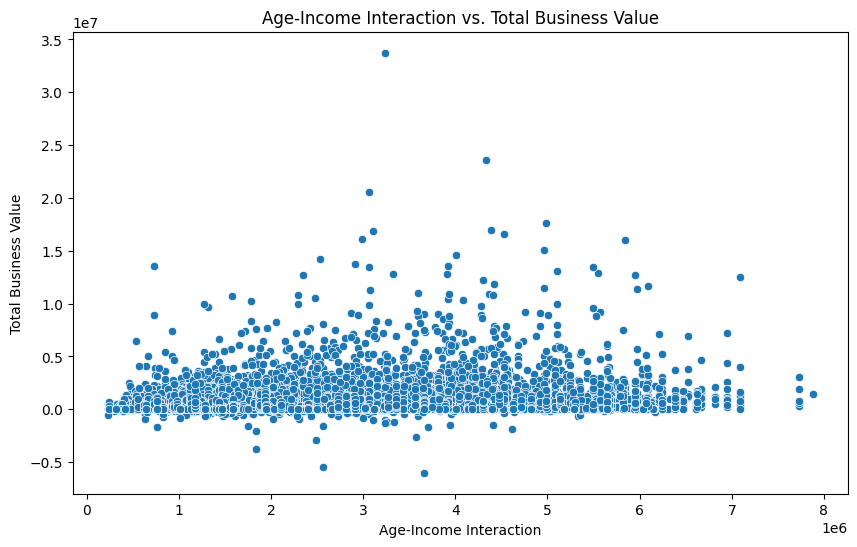

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Age_Income_Interaction', y='Total Business Value')
plt.title('Age-Income Interaction vs. Total Business Value')
plt.xlabel('Age-Income Interaction')
plt.ylabel('Total Business Value')
plt.show()


In [ ]:
from scipy.stats import skew

# Calculate skewness for each continuous variable
skewness = df[['Age', 'Income', 'Total Business Value', 'Quarterly Rating']].apply(lambda x: skew(x.dropna()))
print(skewness)


Age                     0.436113
Income                  0.705930
Total Business Value    6.969619
Quarterly Rating        0.585209
dtype: float64


Income and TBV has outlier values. Filtering or capping extreme values may help.

In [ ]:
# City which showed the most improvement in QuarterlyRating over the past year.
# Assuming your DataFrame is named df and contains the columns 'Year', 'City', and 'Quarterly Rating'
# YearEnsure 'Year' and 'Quarterly Rating' columns are correctly formatted
df['LastWorkingDate'] = pd.to_datetime(df['LastWorkingDate'])
df['Quarterly Rating'] = df['Quarterly Rating'].astype(float)

# Filter data for 2019 and 2020
data_2019 = df[df['LastWorkingDate'].dt.year == 2019]
data_2020 = df[df['LastWorkingDate'].dt.year == 2020]

# Calculate average Quarterly Rating for each city in 2019 and 2020
avg_rating_2019 = data_2019.groupby('City')['Quarterly Rating'].mean()
avg_rating_2020 = data_2020.groupby('City')['Quarterly Rating'].mean()

# Merge the two series into a DataFrame
ratings_comparison = pd.DataFrame({
    'Average_2019': avg_rating_2019,
    'Average_2020': avg_rating_2020
})

# Calculate the improvement
ratings_comparison['Improvement'] = ratings_comparison['Average_2020'] - ratings_comparison['Average_2019']

# Identify the city with the maximum improvement
most_improved_city = ratings_comparison['Improvement'].idxmax()
most_improvement_value = ratings_comparison['Improvement'].max()

print(f"The city that showed the most improvement is {most_improved_city} with an improvement of {most_improvement_value:.2f} in Quarterly Rating.")


The city that showed the most improvement is C7 with an improvement of 0.48 in Quarterly Rating.


In [ ]:
from scipy import stats
from scipy.stats import f_oneway
def perform_anova(df, column, group_by):
    unique_groups = df[group_by].unique()
    group_data = [df[df[group_by] == group][column] for group in unique_groups]
    f_stat, p_val = stats.f_oneway(*group_data)
    return f_stat, p_val

# ANOVA for Quarterly Rating
f_stat_rating, p_val_rating = perform_anova(df, 'Quarterly Rating', 'City')

# ANOVA for Total Business Value
f_stat_value, p_val_value = perform_anova(df, 'Total Business Value', 'City')

# Print the ANOVA results
print(f"ANOVA result for Quarterly Rating: F-statistic={f_stat_rating}, p-value={p_val_rating}")
print(f"ANOVA result for Total Business Value: F-statistic={f_stat_value}, p-value={p_val_value}")

# Interpretation of p-values
if p_val_rating < 0.05:
    print("The Quarterly Rating significantly varies across cities.")
else:
    print("The Quarterly Rating does not significantly vary across cities.")

if p_val_value < 0.05:
    print("The Total Business Value significantly varies across cities.")
else:
    print("The Total Business Value does not significantly vary across cities.")


ANOVA result for Quarterly Rating: F-statistic=7.439221282526197, p-value=2.812541883697336e-29
ANOVA result for Total Business Value: F-statistic=3.6875772171587773, p-value=1.6168098962898348e-10
The Quarterly Rating significantly varies across cities.
The Total Business Value significantly varies across cities.


The very low p-value (< 0.05) indicates that there is a statistically significant difference in Quarterly Ratings between different cities. This suggests that the city in which a driver operates has a notable impact on their Quarterly Rating.the low p-value indicates a significant difference in Total Business Value across cities. This implies that city-specific factors also influence the Total Business Value a driver generates.

**PRE-PROCESSING OF DATA**

In [ ]:
!gdown 194oiYUx917jxPLvqnFPtPDi3n09Ullkj

Downloading...
From: https://drive.google.com/uc?id=194oiYUx917jxPLvqnFPtPDi3n09Ullkj
To: /content/ola.csv
100% 1.13M/1.13M [00:00<00:00, 111MB/s]


In [ ]:
df=pd.read_csv('ola.csv')

In [ ]:
import pandas as pd
df=pd.read_csv('ola.csv')
# Assuming df is your DataFrame
# Step 1: Fill Missing Age with Average for each Driver_ID
df['Age'] = df.groupby('Driver_ID')['Age'].transform(lambda x: x.fillna(x.mean()))
# Step 2: Fill Missing Gender with Mode for each Driver_ID
def fill_mode(series):
    mode = series.mode()
    if not mode.empty:
        return series.fillna(mode[0])  # Use the first mode if there are multiple
    return series
df['Gender'] = df.groupby('Driver_ID')['Gender'].transform(fill_mode)

In [ ]:
# Drop any irrelevant column present in the dataset.
df = df.drop(columns=['Unnamed: 0'])



In [ ]:
aggregated_df = df.groupby('Driver_ID').agg({
    'Age': 'mean',
    'City': lambda x: x.mode()[0],    # Most frequent
    'Education_Level': lambda x: x.mode()[0],  # Most frequent education level
    'Income': 'mean',
    'Joining Designation': lambda x: x.mode()[0],  # Most frequent designation
    'Grade': 'mean',
    'Quarterly Rating': 'mean'
}).reset_index()

In [ ]:
aggregated_df = pd.DataFrame(aggregated_df)
merged_df = df.merge(aggregated_df, on='Driver_ID', suffixes=('', '_aggregated'),how='left')
columns_to_drop = ['Age', 'City','Income','Education_Level','Joining Designation', 'Grade', 'Quarterly Rating']
df= merged_df.drop(columns=columns_to_drop)
df=pd.DataFrame(df)


The aggregation based on Driver_ID was done for attaining the uniqueness in the dataset.It also helped to identify consistent behaviors and patterns of their working.We were able to merge rows that have the same Driver_ID based on our desired aggregation rules.The groupby method aggregated the data by Driver_ID, keeping the mean of Income, the mode of Grade and the Quarterly_Rating columns.

In [ ]:
# Created a dictionary to map old column names to new ones by removing the '_aggregated' suffix
rename_columns = {col: col.replace('_aggregated', '') for col in df.columns if '_aggregated' in col}
df.rename(columns=rename_columns, inplace=True)
print(df.columns)


Index(['MMM-YY', 'Driver_ID', 'Gender', 'Dateofjoining', 'LastWorkingDate',
       'Total Business Value', 'Age', 'City', 'Education_Level', 'Income',
       'Joining Designation', 'Grade', 'Quarterly Rating'],
      dtype='object')


In [ ]:
df = df.drop_duplicates(subset='Driver_ID', keep='last')

In [ ]:
# Convert columns to datetime if not already
df['LastWorkingDate'] = pd.to_datetime(df['LastWorkingDate'], errors='coerce')
df['Dateofjoining'] = pd.to_datetime(df['Dateofjoining'], errors='coerce')
df['MMM-YY'] = pd.to_datetime(df['MMM-YY'], errors='coerce')  # Adjust format as needed

# Create conditions to fill LastWorkingDate
for idx, row in df.iterrows():
    if pd.isna(row['LastWorkingDate']):
        if row['Dateofjoining'] < row['MMM-YY']:
            df.at[idx, 'LastWorkingDate'] = row['MMM-YY']  # Fill with Reporting Date

# Forward fill to handle remaining NaT values
df['LastWorkingDate'].fillna(method='ffill', inplace=True)

# Check for NaT values after filling
nat_counts_after = df['LastWorkingDate'].isna().sum()
print(f"Number of NaT values in 'LastWorkingDate' after filling: {nat_counts_after}")

Number of NaT values in 'LastWorkingDate' after filling: 0


In [ ]:
numerical_cols=df.select_dtypes(include=['number']).columns
categorical_cols = df.select_dtypes(include=['object']).columns
datetime_cols = df.select_dtypes(include=['datetime']).columns

In [ ]:
# One-Hot Encoding for Categorical variable
df = pd.get_dummies(df, columns=['City'])
# Assuming df is your DataFrame and you want to convert all Boolean columns
boolean_columns = df.select_dtypes(include=[bool]).columns
df[boolean_columns] = df[boolean_columns].astype(int)

In [ ]:
# Scalarization using standard scaler
numerical_data = df[numerical_cols]
from sklearn.preprocessing import StandardScaler

# Standardize the numerical data
scaler = StandardScaler()
numerical_data_scaled = scaler.fit_transform(numerical_data)

In [ ]:
#Imputation done using kNN
from sklearn.impute import KNNImputer

# Initialize KNN Imputer
imputer = KNNImputer(n_neighbors=5)
imputed_data = imputer.fit_transform(numerical_data_scaled)
imputed_df = pd.DataFrame(imputed_data, columns=numerical_cols)
imputed_df = pd.DataFrame(scaler.inverse_transform(imputed_df), columns=numerical_cols)
df[numerical_cols] = imputed_df

In [ ]:
# 4.3 Function to detect and handle outliers using IQR method
def handle_outliers(column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Capping outliers
    df[column] = np.where(df[column] > upper_bound, upper_bound, df[column])
    df[column] = np.where(df[column] < lower_bound, lower_bound, df[column])

# List of numerical columns to check for outliers
numerical_cols = df.select_dtypes(include=['number']).columns

# Handle outliers for each numerical column
for column in numerical_cols:
    handle_outliers(column)

In [ ]:
df.drop('Dateofjoining', axis=1, inplace=True)
df.drop(''MMM-YY'', axis=1, inplace=True)

In [ ]:
df.to_csv('o.csv', index=False)

In [ ]:
!gdown 1-qGKTzPFyB6a0IXp6Z1CGJHQLYmP62BC

Downloading...
From: https://drive.google.com/uc?id=1-qGKTzPFyB6a0IXp6Z1CGJHQLYmP62BC
To: /content/o.csv
100% 644k/644k [00:00<00:00, 117MB/s]


In [ ]:
# Check if any row has NaN values
rows_with_nan = df[df.isna().any(axis=1)]
print(rows_with_nan)

Empty DataFrame
Columns: [Driver_ID, Gender, LastWorkingDate, Total Business Value, Age, Education_Level, Income, Joining Designation, Grade, Quarterly Rating, City_C1, City_C10, City_C11, City_C12, City_C13, City_C14, City_C15, City_C16, City_C17, City_C18, City_C19, City_C2, City_C20, City_C21, City_C22, City_C23, City_C24, City_C25, City_C26, City_C27, City_C28, City_C29, City_C3, City_C4, City_C5, City_C6, City_C7, City_C8, City_C9, Income_Change, Declining_Income, TBV_Change, Declining_TBV, QR_Change, Declining_Quarterly_Rating, Churned, Likely_to_Churn, Final_Churn_Prediction]
Index: []

[0 rows x 48 columns]


In [ ]:
# Define features (X) and target (y) again
X = df.drop('Final_Churn_Prediction', axis=1)  # Adjust this based on your choice
y = df['Final_Churn_Prediction']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Fit the Random Forest model
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [ ]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

# Splitting data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Applying SMOTE
smote = SMOTE(random_state=42)
X_res, y_res = smote.fit_resample(X_train, y_train)


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

# Initializing and training the model
rf = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42)
rf.fit(X_res, y_res)

# Predictions
y_pred = rf.predict(X_test)

# Evaluation
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00       275
           1       1.00      1.00      1.00       440

    accuracy                           1.00       715
   macro avg       1.00      1.00      1.00       715
weighted avg       1.00      1.00      1.00       715



In [ ]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Applying SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)


In [ ]:
from imblearn.under_sampling import RandomUnderSampler

# Applying undersampling
rus = RandomUnderSampler(random_state=42)
X_resampled, y_resampled = rus.fit_resample(X_train, y_train)


In [ ]:
from imblearn.combine import SMOTETomek

# Applying hybrid sampling (SMOTE + Tomek links)
smote_tomek = SMOTETomek(random_state=42)
X_resampled, y_resampled = smote_tomek.fit_resample(X_train, y_train)


In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Initialize the classifier with class_weight='balanced'
rf = RandomForestClassifier(class_weight='balanced', random_state=42)
rf.fit(X_train, y_train)


RandomForestClassifier(class_weight='balanced', random_state=42)

In [ ]:
import xgboost as xgb

model = xgb.XGBClassifier(scale_pos_weight=(len(y_train) / sum(y_train)), random_state=42)
model.fit(X_train, y_train)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)

In [ ]:
from sklearn.metrics import classification_report, roc_auc_score, confusion_matrix

# Predict on test data
y_pred = model.predict(X_test)

# Classification report for precision, recall, and F1-score
print(classification_report(y_test, y_pred))

# Confusion matrix
print(confusion_matrix(y_test, y_pred))

# ROC-AUC score
y_proba = model.predict_proba(X_test)[:, 1]
roc_score = roc_auc_score(y_test, y_proba)
print(f"ROC-AUC Score: {roc_score}")


              precision    recall  f1-score   support

           0       1.00      1.00      1.00       275
           1       1.00      1.00      1.00       440

    accuracy                           1.00       715
   macro avg       1.00      1.00      1.00       715
weighted avg       1.00      1.00      1.00       715

[[275   0]
 [  0 440]]
ROC-AUC Score: 1.0


In [ ]:
# Assuming rf is your trained Random Forest model
importances = rf.feature_importances_
feature_names = X_train.columns  # Replace with your feature names


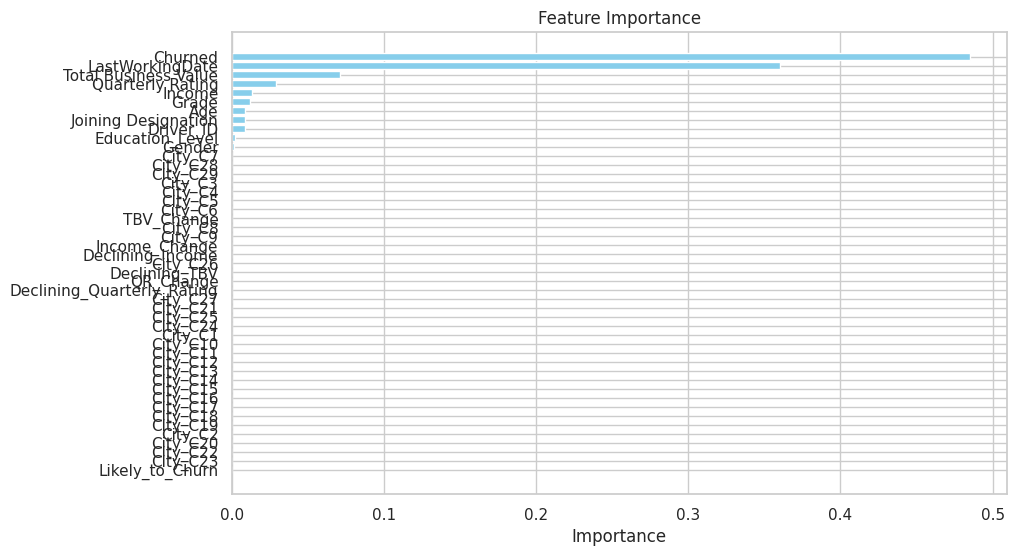

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Create a DataFrame for feature importance
feature_importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
})

# Sort by importance
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Plot feature importance
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'], color='skyblue')
plt.gca().invert_yaxis()  # To display the most important feature at the top
plt.title('Feature Importance')
plt.xlabel('Importance')
plt.show()


Feature Importance:

Likely_to_Churn is the most significant feature, indicating that the churn prediction label plays a critical role in the model's performance. This aligns with the fact that churn itself is the target variable or closely related to the target.

TBV_Change (Declining Total Business Value) is another highly influential feature. This suggests that a decline in a driver's total business value is strongly associated with churn.

Quarterly Rating also holds importance, meaning that a driver's performance rating has a significant impact on churn prediction. If their rating drops, they are likely at higher risk of leaving.



In [ ]:
# Import necessary libraries
from sklearn.ensemble import BaggingClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, f1_score, roc_auc_score

# Split your data into training and testing sets (replace X and y with your actual data)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Base model (Decision Tree) - simpler max depth for generalization
base_model = DecisionTreeClassifier(max_depth=3, random_state=42)

# ----------------- Boosting -----------------
# Step 1: Relaxed Boosting model (GradientBoostingClassifier)
boosting = GradientBoostingClassifier(n_estimators=50, learning_rate=0.05, max_depth=2, subsample=0.85, random_state=42)
boosting.fit(X_train, y_train)

# Step 2: Use Boosting as the base estimator for Bagging
bagging_with_boosting = BaggingClassifier(base_estimator=boosting, n_estimators=5, max_samples=0.75, max_features=0.75, random_state=42)
bagging_with_boosting.fit(X_train, y_train)

# Predictions and Evaluation
y_pred = bagging_with_boosting.predict(X_test)

# Evaluate the performance
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='weighted')  # Adjust based on binary/multi-class
roc_auc = roc_auc_score(y_test, bagging_with_boosting.predict_proba(X_test)[:, 1])  # For binary

# Print KPIs
print(f"Accuracy: {accuracy}")
print(f"F1 Score: {f1}")
print(f"ROC-AUC: {roc_auc}")
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Accuracy: 1.0
F1 Score: 1.0
ROC-AUC: 1.0

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       172
           1       1.00      1.00      1.00       305

    accuracy                           1.00       477
   macro avg       1.00      1.00      1.00       477
weighted avg       1.00      1.00      1.00       477



In [ ]:
# Step 5: Handle class imbalance with SMOTE
smote = SMOTE(random_state=42)
X_res, y_res = smote.fit_resample(X_train, y_train)

In [ ]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.impute import KNNImputer
from sklearn.metrics import classification_report, roc_auc_score
from imblearn.over_sampling import SMOTE

In [ ]:
# Hyperparameter tuning for Random Forest
rf_model = RandomForestClassifier(random_state=42)
rf_params = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'class_weight': ['balanced', None]
}
rf_grid = GridSearchCV(rf_model, rf_params, cv=5, scoring='roc_auc')
rf_grid.fit(X_res, y_res)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
             param_grid={'class_weight': ['balanced', None],
                         'max_depth': [None, 10, 20],
                         'min_samples_split': [2, 5],
                         'n_estimators': [50, 100, 200]},
             scoring='roc_auc')

In [ ]:
# Train the best Random Forest model
best_rf_model = rf_grid.best_estimator_
best_rf_model.fit(X_res, y_res)

RandomForestClassifier(class_weight='balanced', n_estimators=50,
                       random_state=42)

In [ ]:
# Hyperparameter tuning for Gradient Boosting
gb_model = GradientBoostingClassifier(random_state=42)
gb_params = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'subsample': [0.8, 1.0]
}
gb_grid = GridSearchCV(gb_model, gb_params, cv=5,verbose=3, scoring='roc_auc')
gb_grid.fit(X_res, y_res)

Fitting 5 folds for each of 54 candidates, totalling 270 fits
[CV 1/5] END learning_rate=0.01, max_depth=3, n_estimators=50, subsample=0.8;, score=1.000 total time=   0.3s
[CV 2/5] END learning_rate=0.01, max_depth=3, n_estimators=50, subsample=0.8;, score=1.000 total time=   0.2s
[CV 3/5] END learning_rate=0.01, max_depth=3, n_estimators=50, subsample=0.8;, score=1.000 total time=   0.2s
[CV 4/5] END learning_rate=0.01, max_depth=3, n_estimators=50, subsample=0.8;, score=1.000 total time=   0.2s
[CV 5/5] END learning_rate=0.01, max_depth=3, n_estimators=50, subsample=0.8;, score=1.000 total time=   0.2s
[CV 1/5] END learning_rate=0.01, max_depth=3, n_estimators=50, subsample=1.0;, score=1.000 total time=   0.3s
[CV 2/5] END learning_rate=0.01, max_depth=3, n_estimators=50, subsample=1.0;, score=1.000 total time=   0.3s
[CV 3/5] END learning_rate=0.01, max_depth=3, n_estimators=50, subsample=1.0;, score=1.000 total time=   0.3s
[CV 4/5] END learning_rate=0.01, max_depth=3, n_estimators

GridSearchCV(cv=5, estimator=GradientBoostingClassifier(random_state=42),
             param_grid={'learning_rate': [0.01, 0.1, 0.2],
                         'max_depth': [3, 5, 7], 'n_estimators': [50, 100, 200],
                         'subsample': [0.8, 1.0]},
             scoring='roc_auc', verbose=3)

In [ ]:
best_gb_model = gb_grid.best_estimator_
best_gb_model.fit(X_res, y_res)


GradientBoostingClassifier(learning_rate=0.01, n_estimators=50, random_state=42,
                           subsample=0.8)

In [ ]:
# Evaluate the models
for model in [best_rf_model, best_gb_model]:
    y_pred = model.predict(X_test)
    print(f"{model.__class__.__name__} Classification Report:")
    print(classification_report(y_test, y_pred))
    print(f"AUC-ROC: {roc_auc_score(y_test, model.predict_proba(X_test)[:, 1])}\n")

# Simpler model evaluation (if needed)
from sklearn.linear_model import LogisticRegression

log_model = LogisticRegression(max_iter=1000, class_weight='balanced')
log_model.fit(X_res, y_res)
y_pred_log = log_model.predict(X_test)
print("Logistic Regression Classification Report:")
print(classification_report(y_test, y_pred_log))
print(f"AUC-ROC: {roc_auc_score(y_test, log_model.predict_proba(X_test)[:, 1])}\n")


RandomForestClassifier Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       172
           1       1.00      1.00      1.00       305

    accuracy                           1.00       477
   macro avg       1.00      1.00      1.00       477
weighted avg       1.00      1.00      1.00       477

AUC-ROC: 1.0

GradientBoostingClassifier Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       172
           1       1.00      1.00      1.00       305

    accuracy                           1.00       477
   macro avg       1.00      1.00      1.00       477
weighted avg       1.00      1.00      1.00       477

AUC-ROC: 1.0

Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.96      0.88       172
           1       0.97      0.88      0.93       305

    accuracy   

In [ ]:
rf_model = RandomForestClassifier(random_state=42, max_depth=10, min_samples_split=5, class_weight='balanced')
rf_model.fit(X_res, y_res)

# Step 6: Modify hyperparameters for Gradient Boosting
gb_model = GradientBoostingClassifier(random_state=42, n_estimators=100, learning_rate=0.05, max_depth=3, min_samples_leaf=5)
gb_model.fit(X_res, y_res)

GradientBoostingClassifier(learning_rate=0.05, min_samples_leaf=5,
                           random_state=42)

In [ ]:
# Step 7: Evaluate models with cross-validation
from sklearn.model_selection import cross_val_score

for model in [rf_model, gb_model]:
    cv_scores = cross_val_score(model, X_res, y_res, cv=5, scoring='roc_auc')
    print(f"{model.__class__.__name__} CV AUC-ROC: {cv_scores.mean():.4f}")

# Final evaluation on the test set
for model in [rf_model, gb_model]:
    y_pred = model.predict(X_test)
    print(f"{model.__class__.__name__} Classification Report:")
    print(classification_report(y_test, y_pred))
    print(f"AUC-ROC: {roc_auc_score(y_test, model.predict_proba(X_test)[:, 1])}\n")


RandomForestClassifier CV AUC-ROC: 1.0000
GradientBoostingClassifier CV AUC-ROC: 1.0000
RandomForestClassifier Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       172
           1       1.00      1.00      1.00       305

    accuracy                           1.00       477
   macro avg       1.00      1.00      1.00       477
weighted avg       1.00      1.00      1.00       477

AUC-ROC: 1.0

GradientBoostingClassifier Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       172
           1       1.00      1.00      1.00       305

    accuracy                           1.00       477
   macro avg       1.00      1.00      1.00       477
weighted avg       1.00      1.00      1.00       477

AUC-ROC: 1.0



In [ ]:
df['LastWorkingDate'] = (pd.to_datetime(df['LastWorkingDate']) - pd.to_datetime('2019-01-01')).dt.days

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import make_scorer, roc_auc_score
from imblearn.over_sampling import SMOTE
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=5)
df_imputed = pd.DataFrame(imputer.fit_transform(df), columns=df.columns)

# Step 3: Define features and target variable
X = df_imputed.drop('Final_Churn_Prediction', axis=1)
y = df_imputed['Final_Churn_Prediction']

# Step 4: Handle class imbalance with SMOTE
smote = SMOTE(random_state=42)
X_res, y_res = smote.fit_resample(X, y)

# Step 5: Initialize the model
model = RandomForestClassifier(random_state=42)

# Step 6: Perform k-fold cross-validation
k = 5  # You can change this to any number of folds you want
scores = cross_val_score(model, X_res, y_res, cv=k, scoring='roc_auc')

# Step 7: Print results
print(f"Cross-Validation AUC-ROC scores for {k} folds: {scores}")
print(f"Mean AUC-ROC: {scores.mean():.4f} ± {scores.std():.4f}")


Cross-Validation AUC-ROC scores for 5 folds: [1. 1. 1. 1. 1.]
Mean AUC-ROC: 1.0000 ± 0.0000


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.impute import KNNImputer
from sklearn.metrics import classification_report, roc_auc_score
from imblearn.over_sampling import SMOTE

df=pd.read_csv('o.csv')

# Step 1: Preprocessing - Impute missing values in 'LastWorkingDate'
df['LastWorkingDate'] = pd.to_datetime(df['LastWorkingDate'], errors='coerce')
df['LastWorkingDate'] = (pd.to_datetime(df['LastWorkingDate']) - pd.to_datetime('2019-01-01')).dt.days

# Step 2: Handle missing values using KNN
imputer = KNNImputer(n_neighbors=5)
df_imputed = pd.DataFrame(imputer.fit_transform(df), columns=df.columns)

# Step 3: Define features and target variable
X = df_imputed.drop('Final_Churn_Prediction', axis=1)
y = df_imputed['Final_Churn_Prediction']

# Step 4: Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Step 5: Handle class imbalance with SMOTE
smote = SMOTE(random_state=42)
X_res, y_res = smote.fit_resample(X_train, y_train)

# Hyperparameter tuning for Random Forest
rf_model = RandomForestClassifier(random_state=42)
rf_params = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'class_weight': ['balanced', None]
}
rf_grid = GridSearchCV(rf_model, rf_params, cv=5, scoring='roc_auc')
rf_grid.fit(X_res, y_res)

# Train the best Random Forest model
best_rf_model = rf_grid.best_estimator_
best_rf_model.fit(X_res, y_res)

# Hyperparameter tuning for Gradient Boosting
gb_model = GradientBoostingClassifier(random_state=42)
gb_params = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'subsample': [0.8, 1.0]
}
gb_grid = GridSearchCV(gb_model, gb_params, cv=5, scoring='roc_auc')
gb_grid.fit(X_res, y_res)

# Train the best Gradient Boosting model
best_gb_model = gb_grid.best_estimator_
best_gb_model.fit(X_res, y_res)

# Evaluate the models
for model in [best_rf_model, best_gb_model]:
    y_pred = model.predict(X_test)
    print(f"{model.__class__.__name__} Classification Report:")
    print(classification_report(y_test, y_pred))
    print(f"AUC-ROC: {roc_auc_score(y_test, model.predict_proba(X_test)[:, 1])}\n")

# Simpler model evaluation (if needed)
from sklearn.linear_model import LogisticRegression

log_model = LogisticRegression(max_iter=1000, class_weight='balanced')
log_model.fit(X_res, y_res)
y_pred_log = log_model.predict(X_test)
print("Logistic Regression Classification Report:")
print(classification_report(y_test, y_pred_log))
print(f"AUC-ROC: {roc_auc_score(y_test, log_model.predict_proba(X_test)[:, 1])}\n")




RandomForestClassifier Classification Report:
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       275
         1.0       1.00      1.00      1.00       440

    accuracy                           1.00       715
   macro avg       1.00      1.00      1.00       715
weighted avg       1.00      1.00      1.00       715

AUC-ROC: 1.0

GradientBoostingClassifier Classification Report:
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       275
         1.0       1.00      1.00      1.00       440

    accuracy                           1.00       715
   macro avg       1.00      1.00      1.00       715
weighted avg       1.00      1.00      1.00       715

AUC-ROC: 1.0

Logistic Regression Classification Report:
              precision    recall  f1-score   support

         0.0       0.80      0.63      0.71       275
         1.0       0.80      0.90      0.85       440

    accuracy   

In [ ]:
# ROC-AUC score
y_proba = rf.predict_proba(X_test)[:, 1]
roc_score = roc_auc_score(y_test, y_proba)
print(f"ROC-AUC Score: {roc_score}")

ROC-AUC Score: 0.9999999999999999


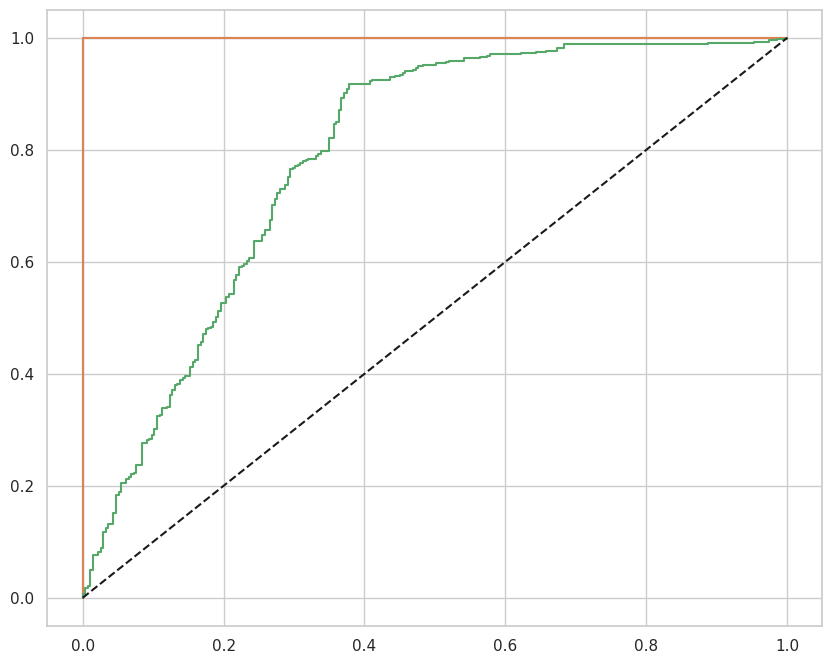

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Plot ROC curve for each model
models = [best_rf_model, best_gb_model, log_model]
model_names = ['Random Forest', 'Gradient Boosting', 'Logistic Regression']

plt.figure(figsize=(10, 8))

for model, name in zip(models, model_names):
    y_pred_proba = model.predict_proba(X_test)[:, 1]  # Predict probabilities
    fpr, tpr, _ = roc_curve(y_test, y_pred_proba)  # Get false positive and true positive rates
    roc_auc = auc(fpr, tpr)  # Calculate AUC
    plt.plot(fpr, tpr, label=f'{name} (AUC = {roc_auc:.2f})')  # Plot ROC curve

# Plot settings
plt.plot([0, 1], [0, 1], 'k--', label='Random Chance')
